# Medical Cost Personal Insurance - Prediction

Problem Statement:
    
Insurance Forecast by using Regression Algorithms

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. 
These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. 
The main purpose of medical insurance is to receive the best medical care without any strain on your finances. 
Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, 
day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features 
such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated.


Columns:                                            

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

Predict : Charges  Can you accurately predict insurance costs?
    
    

In [350]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [351]:
medcost = pd.read_csv("medical_cost_insurance.csv")
medcost

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis (EDA)

# Data Pre Processing

In [352]:
# Checking the dimension of the dataset

medcost.shape

(1338, 7)

In [353]:
# Checking sample of the dataset

medcost.sample(10)

,age,sex,bmi,children,smoker,region,charges
658,48,female,35.910,1,no,northeast,26392.26029
753,58,female,22.770,0,no,southeast,11833.78230
788,29,male,22.515,3,no,northeast,5209.57885
180,58,male,28.595,0,no,northwest,11735.87905
571,18,female,37.290,1,no,southeast,2219.44510
1301,62,male,30.875,3,yes,northwest,46718.16325
896,43,female,20.045,2,yes,northeast,19798.05455
881,23,male,27.360,1,no,northwest,2789.05740
1285,47,female,24.320,0,no,northeast,8534.67180
1245,28,male,24.300,5,no,southwest,5615.36900


In [354]:
# Checking the column 

medcost.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [355]:
# Checking the datatypes

medcost.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [356]:
# Checking the unique value in the dataset

medcost.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [357]:
# Checking null values in the dataset

medcost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

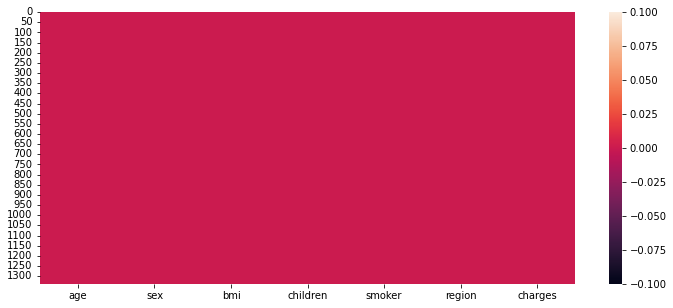

In [358]:
# Checking the null values in heatmap

plt.figure(figsize=(12,5))
sns.heatmap(medcost.isnull())

Analysis:
    
Medical Cost Insurance dataset contains 1338 rows and 7 columns

Datset contains 3 object,2 integer and 2 float columns

No null values found in the dataset

Charges is the target variable 

After analysing the problemm statement and data we can conclude that our datset is regression type and we have to apply
regression algorithms 

# Visualization: Univariate Analysis

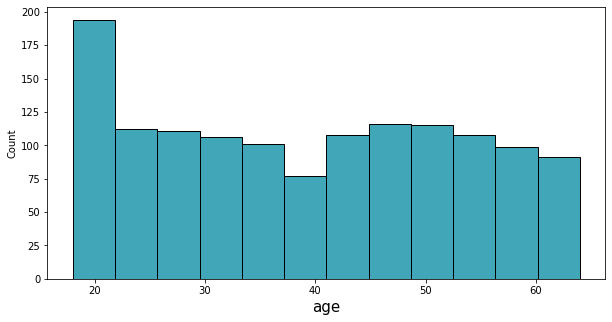

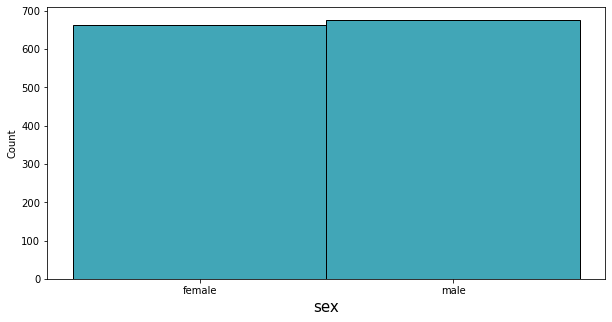

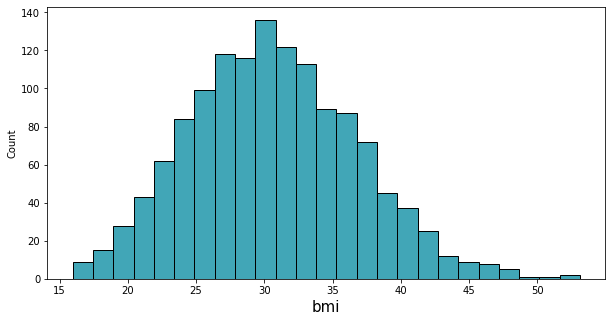

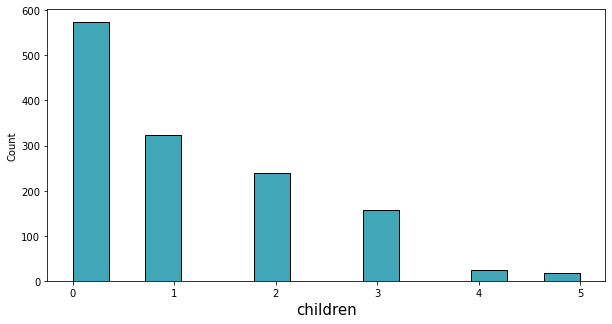

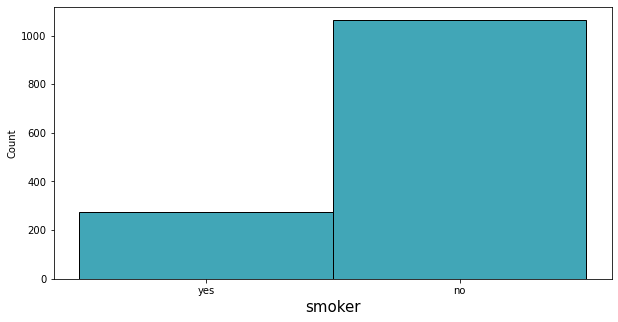

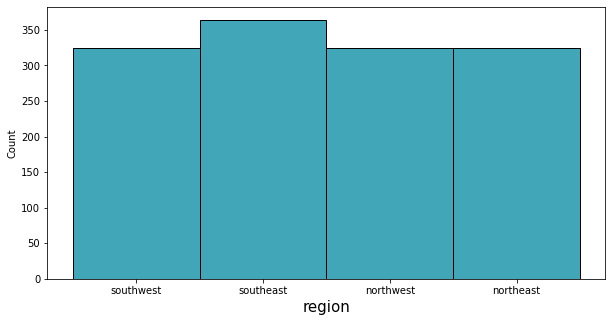

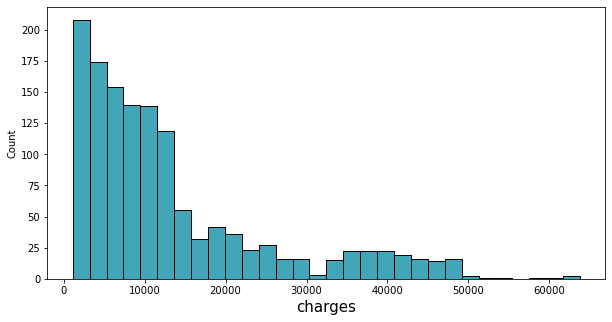

In [359]:
# Visualizing the data by hist plot

for i in medcost.columns[0:7]:
    plt.figure(figsize=(10,5))
    sns.histplot(medcost, x = medcost[i],color='#01889f')
    plt.xlabel(i,fontsize=15)
plt.show()

# Visualization: Bivariate Analysis

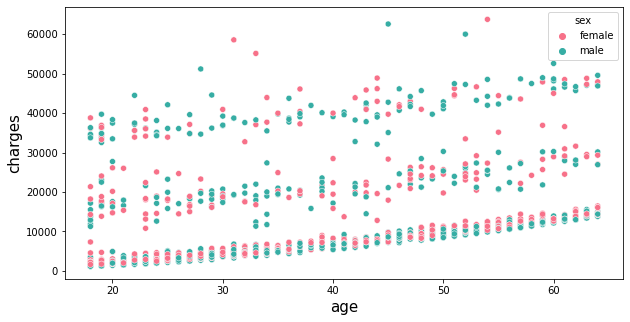

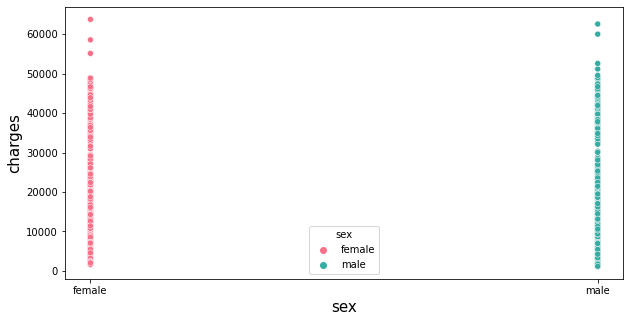

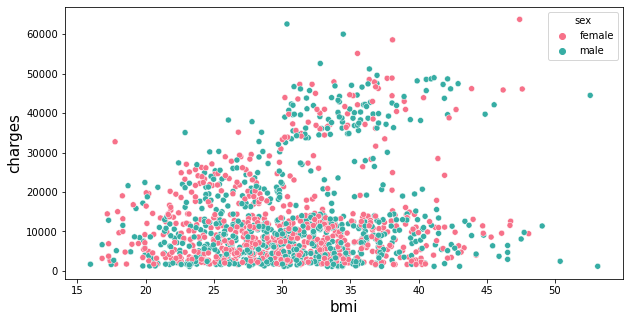

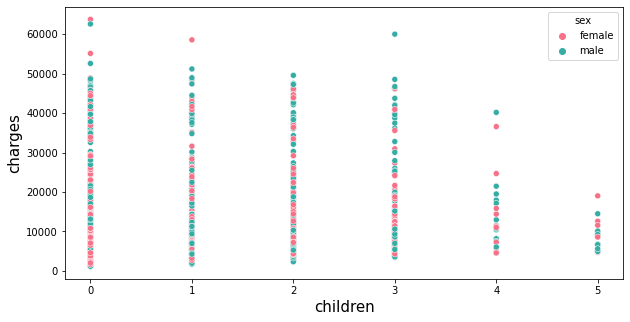

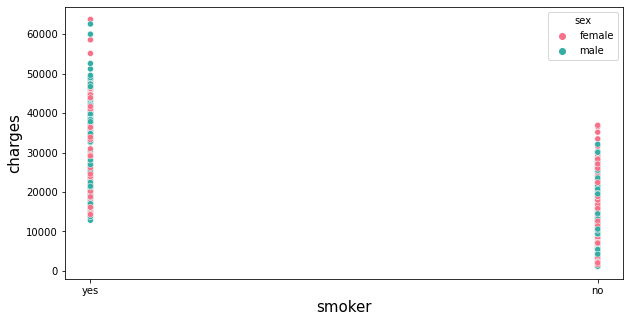

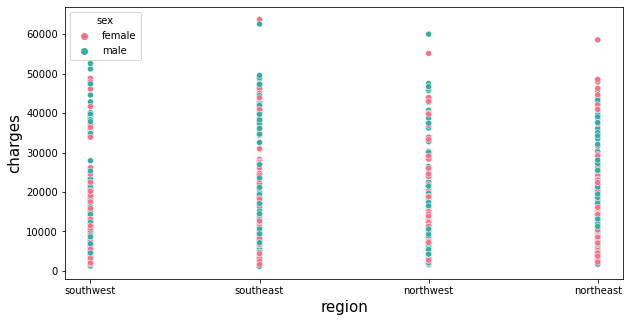

In [360]:
# Visualizing the dataset using scatter plot

for i in medcost.columns[0:6]:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data= medcost,x =medcost[i],y='charges',hue="sex",palette="husl" )
    plt.xlabel(i,fontsize=15)
    plt.ylabel('charges',fontsize=15)
plt.show()
    

Analysis:

Medical cost charges are increaing when the age is increaing 

Male count is high compared with female

BMI count is high from age range 25 to 35

Individual medical costs is high when numbers compared with childrens and dependents

Smokers charges are high when compared to non smokers

Region wise all 4 are similar but southwest region count is high compared with other regions

# Data Feature Selection and Engineering

In [361]:
# Applying Label encoder to categorical columns region,sex and and smoker for analysis 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in medcost.columns:
    if(medcost[i].dtypes=='object'):
        medcost[i]=le.fit_transform(medcost[i].values.reshape(-1,1))
medcost

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [362]:
# Checking the datset with describe function


medcost.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Analysis:

Count is same as we dont see any missing values

We dont find much skewness comparing mean and median

even we dont find much outliers, but we will do further analysis on the dataset

In [363]:
# Checking the correlation of the dataset

medcost.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

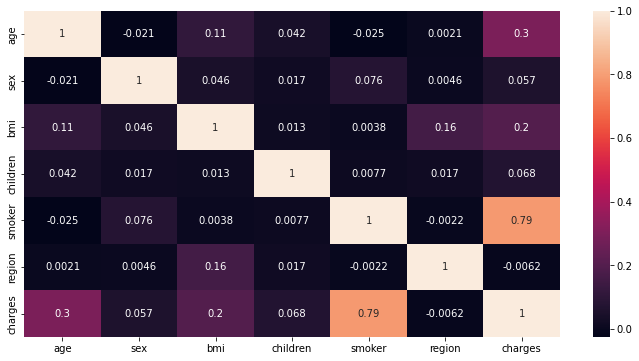

In [364]:
# Visualizing correlation by heatmap

plt.figure(figsize=(12,6))
sns.heatmap(medcost.corr(),annot=True)

Analysis:
    
Smoker is highly positively correlated with charges

sex vs age, smoker vs age, region vs smoker are negatively correlated to one another

Moreover these are categorical columns which has been encoded

In [365]:
# Checking skewness

medcost.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

Analysis:
    
Skewness is high in smoker and children.

We cannot apply power transform to reduce skewness in categorical data

In [366]:
# Checking outliers using Z score

from scipy.stats import zscore


z1 = medcost[medcost.columns]
z1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [367]:
z = np.abs(zscore(z1))
threshold = 3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [368]:
medcost_new = z1[(z<3).all(axis=1)]

In [369]:
medcost.shape

(1338, 7)

In [370]:
medcost_new.shape

(1309, 7)

In [371]:
# Checking the dataloss

dataloss = (1338-1309)/1338*100
dataloss

2.167414050822123

We got 2% of dataloss by removing outliers

In [372]:
# Checking Variance inflation factor for the dataset 

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = medcost_new.iloc[:,0:6]
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [373]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

   VIF Factor  Features
0    7.660034       age
1    1.990722       sex
2   10.534373       bmi
3    1.851725  children
4    1.254028    smoker
5    2.903540    region


Analysis:
    
BMI and Age got high vif values compared with other columns

In [374]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

st = StandardScaler()
x1 = pd.DataFrame(st.fit_transform(x),columns=x.columns)
x1

,age,sex,bmi,children,smoker,region
0,-1.439063,-1.005362,-0.449359,-0.929616,1.984848,1.352753
1,-1.510086,0.994667,0.533391,-0.040093,-0.503817,0.447460
2,-0.799859,0.994667,0.404478,1.738954,-0.503817,0.447460
3,-0.444746,0.994667,-1.319101,-0.929616,-0.503817,-0.457833
4,-0.515769,0.994667,-0.285288,-0.929616,-0.503817,-0.457833
...,...,...,...,...,...,...
1304,0.762639,0.994667,0.064617,1.738954,-0.503817,-0.457833
1305,-1.510086,-1.005362,0.223666,-0.929616,-0.503817,-1.363127
1306,-1.510086,-1.005362,1.049041,-0.929616,-0.503817,0.447460
1307,-1.297018,-1.005362,-0.800939,-0.929616,-0.503817,1.352753


In [375]:
# Checking VIF after applying scaling method

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
print(vif)

   VIF Factor  Features
0    1.019082       age
1    1.008815       sex
2    1.043841       bmi
3    1.005176  children
4    1.007983    smoker
5    1.026656    region


# Model Evaluation

In [376]:
# Splitting X and Y variables for further analysis

In [377]:
x1.shape

(1309, 6)

In [378]:
y = medcost_new['charges']
y.shape

(1309,)

In [379]:
# Importing required Libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

In [380]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=.30,random_state=i)
    rf = RandomForestRegressor()
    rf.fit(x1_train,y_train)
    predrf = rf.predict(x1_test)
    acc = r2_score(y_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max r2 score is ", maxAcc*100, "on Random state", maxRS)
    

Max r2 score is  90.40848337134554 on Random state 27


Based on Model evaluation wee can see the R2 score is 90% and Best Random state is 27

# Creating training model

In [381]:
x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=.30, random_state=27)

# Regularization with L1 and L2

In [382]:
from sklearn.linear_model import Lasso,Ridge

In [385]:
ls = Lasso(0.0001)
ls.fit(x1_train,y_train)
ls.score(x1_train,y_train)

0.7238854306117612

In [387]:
rd = Ridge(alpha = 0.0001) 
rd.fit(x1_train,y_train)
rd.score(x1_train,y_train)

0.7238854306117528

# Model Selection

In [388]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

LR = LinearRegression()
RFR = RandomForestRegressor()
svr = SVR()
DTR = DecisionTreeRegressor()
GBR = GradientBoostingRegressor()
KNR = KNeighborsRegressor()
BR = BaggingRegressor()
SR = SGDRegressor()
ABR = AdaBoostRegressor()
ETR = AdaBoostRegressor()

Model = [LR,RFR,svr,DTR,GBR,KNR,BR,SR,ABR,ETR]

for m in Model:
    m.fit(x1_train,y_train)
    m.score(x1_train,y_train)
    predmod = m.predict(x1_test)
    score = r2_score(y_test,predmod)
    print("R2_score of", m,"is:",score*100)
    print("Mean absolute error: ", mean_absolute_error(y_test,predmod))
    print("Mean squared error: ", mean_squared_error(y_test,predmod))
    print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,predmod)))
    print('*************************************************************')

R2_score of LinearRegression() is: 81.63956888560486
Mean absolute error:  3779.4309941230854
Mean squared error:  25743369.30524331
Root Mean absolute error:  5073.792398713541
*************************************************************
R2_score of RandomForestRegressor() is: 90.23177548573898
Mean absolute error:  2194.222297938169
Mean squared error:  13696138.69959703
Root Mean absolute error:  3700.82946102587
*************************************************************
R2_score of SVR() is: -5.252297700992403
Mean absolute error:  8039.744863193482
Mean squared error:  147575443.7932392
Root Mean absolute error:  12148.063376243936
*************************************************************
R2_score of DecisionTreeRegressor() is: 68.74594814856158
Mean absolute error:  3136.0141478854957
Mean squared error:  43821661.59845693
Root Mean absolute error:  6619.79316885784
*************************************************************
R2_score of GradientBoostingRegressor() is: 9

Gradient Boosting Regressor is performing well with  R2 score of 91.8%

R2_score of GradientBoostingRegressor() is: 91.83111927708474
    
Mean absolute error:  2083.4979678257405
    
Mean squared error:  11453680.578100003
    
Root Mean absolute error:  3384.328674656172

# Cross Validation Score

In [389]:
from sklearn.model_selection import cross_val_score

cr1 = cross_val_score(LR,x1,y, cv=10)
cr2 = cross_val_score(RFR,x1,y, cv=10)
cr3 = cross_val_score(svr,x1,y, cv=10)
cr4 = cross_val_score(DTR,x1,y, cv=10)
cr5 = cross_val_score(GBR,x1,y, cv=10)
cr6 = cross_val_score(KNR,x1,y, cv=10)
cr7 = cross_val_score(BR,x1,y, cv=10)
cr8 = cross_val_score(SR,x1,y, cv=10)
cr9 = cross_val_score(ABR,x1,y, cv=10)
cr10 = cross_val_score(ETR,x1,y, cv=10)

print('CV score of Linear Regression:',cr1.mean()*100)
print('CV score of Random Forest Regressor:',cr2.mean()*100)
print('CV score of Support Vector Regressor:',cr3.mean()*100)
print('CV score of Decision Tree Regressor:',cr4.mean()*100)
print('CV score of Gradient Boost Regressor:',cr5.mean()*100)
print('CV score of K Neighbors Regressor:',cr6.mean()*100)
print('CV score of Bagging Regressor:',cr7.mean()*100)
print('CV score of SGDRegressor:',cr8.mean()*100)
print('CV score of AdaBoostRegressor:',cr9.mean()*100)
print('CV score of ExtraTrees Regressor:',cr10.mean()*100)

CV score of Linear Regression: 74.86268518102818
CV score of Random Forest Regressor: 83.32165801054944
CV score of Support Vector Regressor: -9.671556842023074
CV score of Decision Tree Regressor: 69.3117144490079
CV score of Gradient Boost Regressor: 85.28633749674388
CV score of K Neighbors Regressor: 81.17860898644958
CV score of Bagging Regressor: 81.97769667721178
CV score of SGDRegressor: 74.87489539870204
CV score of AdaBoostRegressor: 81.94176148058145
CV score of ExtraTrees Regressor: 82.27799765582742


Gradient Boost Regressor got the best CV score of : 85.28633749674388

# Hyperparameter tuning

In [400]:
from sklearn.model_selection import GridSearchCV

grid_params={'n_estimators':[50,100,150,200,250],'alpha':[1,0.1,0.01,0.001]}

gs = GridSearchCV(GradientBoostingRegressor(),param_grid=grid_params)

g_res = gs.fit(x1_train,y_train)
g_res

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [401]:
g_res.best_score_

0.8227328250381033

In [402]:
g_res.best_params_

{'alpha': 0.01, 'n_estimators': 50}

# Final Model

In [403]:
Final_Model = GradientBoostingRegressor(alpha=0.01,n_estimators=50)
                                       
Final_Model.fit(x1_train,y_train)
pred = Final_Model.predict(x1_test)
scores = r2_score(y_test,pred)
print("R2 Score:",scores*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred))
print("Mean squared error: ", mean_squared_error(y_test,pred))
print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 92.31134989374067
Mean absolute error:  2124.9473520397423
Mean squared error:  10780343.768129043
Root Mean absolute error:  3283.3433826100254


By using Hyperparameter tuning we can see an increase in the R2 score accuracy.

Concluding Gradient Boosting Regressor is the best fit model for our testing with 92.31%  R2 score.

# Saving the model

In [404]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_Model,"Medical_insurance_cost_pred.pkl")

['Medical_insurance_cost_pred.pkl']

# Predicting the Model

In [405]:
# Loading the saved model

Model=joblib.load("Medical_insurance_cost_pred.pkl")

#Prediction
prediction = Model.predict(x1_test)
prediction

array([16994.84894337,  6666.80026781, 41229.81421418, 43087.56765999,
       10546.06808518, 10356.53009741,  4638.58145659,  9263.47869153,
        5510.75183941,  6819.44340659,  9611.692251  , 24881.60916972,
       21863.80065522,  6356.4161088 , 17708.60215502, 23342.07901951,
       13112.8267275 , 14574.22097186,  9009.49561712,  7098.25007265,
       11025.80552736,  7181.15856494, 14367.83650869,  8210.26005414,
        5890.02163938, 35701.49819161, 10480.98486342,  7220.49474312,
        9589.79096847, 12830.60356464,  6767.98378766,  2991.96580544,
        5801.34423865,  7864.50609976, 12909.98115265, 12708.75130883,
       13289.6806346 , 23326.67213817, 13731.81730298, 13125.52276858,
        3144.954229  , 45985.80521299,  6124.33968978,  6853.33652322,
       38743.28451551,  9414.96353507, 11020.86569262, 15952.78324069,
        4426.62060827, 14688.17347405, 12253.50039217,  3349.62780091,
        6542.55491769,  9942.72027674, 14863.2991911 ,  7034.68908773,
      

In [406]:
pd.DataFrame([Model.predict(x1_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,16994.848943,16085.12750
1,6666.800268,3292.52985
2,41229.814214,41919.09700
3,43087.567660,44260.74990
4,10546.068085,9866.30485
...,...,...
388,12627.936739,10355.64100
389,12627.936739,11082.57720
390,35023.332630,34838.87300
391,15831.780050,12347.17200


# Conclusion

Predicted charges are similar more similar when compared with Original charges

Concluding Gradient Boosting Regressor is the best fit model for our testing with 92.31% R2 score